# Quantum searching

## Introduction

In this lesson we'll discuss *Grover's algorithm*, which is a quantum algorithm for so-called *unstructured search* problems that offers a quadratic improvement over classical algorithms.
This algorithm, together with its extensions and underlying methodology, turn out to be broadly applicable, leading to a quadratic advantage for many interesting computational tasks that may not initially look like unstructured search problems on the surface.

While the broad applicability of Grover's searching technique is compelling, it should be acknowledged here at the start of the lesson that the quadratic advantage it offers seems unlikely to lead to a practical advantage of quantum over classical computing any time soon.
Classical computing hardware is currently so much more advanced than quantum computing hardware that the quadratic quantum-over-classical advantage offered by Grover's algorithm is certain to be washed away by the staggering clock speeds of modern classical computers for any unstructured search problem that could feasibly be run on the quantum computers of today.

As quantum computing technology advances, however, Grover's algorithm does have potential.
Indeed, some of the most important and impactful classical algorithms ever discovered, including the fast Fourier transform and fast sorting (e.g., quicksort and mergesort), offer slightly less than a quadratic advantage over naive approaches to the problems they solve.
The key difference here, of course, is that an entirely new technology (meaning quantum computing) is required to run Grover's algorithm.
While this technology is still very much in its infancy in comparison to classical computing, we should not be so quick to underestimate the potential of technological advances that could allow a quadratic advantage of quantum over classical computing to one day offer tangible practical benefits.

## Unstructured search

### Summary

We'll begin with a description of the problem that Grover's algorithm solves.
As usual, we'll let $\Sigma = \{0,1\}$ denote the binary alphabet throughout this discussion.

Suppose that

$$
f:\Sigma^n \rightarrow \Sigma
$$

is a function from binary strings of length $n$ to bits.
We'll assume that we can compute this function efficiently, but otherwise it's arbitrary and we can't rely on it having a special structure or specific implementation that suits our needs.

What Grover's algorithm does is to search for a string $x\in\Sigma^n$ for which $f(x) = 1.$ 
We'll refer to strings like this as *solutions* to the searching problem.
If there are multiple solutions, then any one of them is considered to be a correct output, and if there are no solutions, then a correct answer requires that we report that there are no solutions.

We describe this task as an *unstructured search* problem because we can't rely on $f$ having any particular structure to make it easy.
We're not searching an ordered list or within some data structure specifically designed to facilitate searching — we're essentially looking for a needle in a haystack.
From an intuitive point of view, we might imagine that we have an extremely complicated Boolean circuit that computes $f,$ and we can easily run this circuit on a selected input string if we choose — but because it's so convoluted, we have no hope of making sense of the circuit by examining it (beyond having the ability to evaluate it on selected input strings).

One way to perform this searching task classically is to simply iterate through all of the strings $x\in\Sigma^n,$ evaluating $f$ on each one to check whether or not it is a solution.
Hereafter, let's write $N = 2^n$ just for the sake of convenience, so we can say that there are $N$ strings in $\Sigma^n.$
Iterating through all of them requires $N$ evaluations of $f.$
Operating under the assumption that we're limited to evaluating $f$ on chosen inputs, this is the best we can do with a deterministic algorithm if we want to guarantee success.
With a probabilistic algorithm, we might hope to save time by randomly choosing input strings to $f,$ but we'll still require $O(N)$ evaluations of $f$ in we want this method to succeed with high probability.

Grover's algorithm solves the unstructured search problem described above with high probability, and required just $O(\sqrt{N})$ evaluations of $f.$
To be clear, these function evaluations must happen *in superposition*, similar to the query algorithms discussed in Lesson 5 (including Deutsch's algorithm, the Deutsch-Jozsa algorithm, and Simon's algorithm).
Grover's algorithm takes an iterative approach: it evaluates $f$ on superpositions of input strings and intersperses these evaluations with other operations that have the effect of creating interference patterns, leading to a solution with high probability (if one exists) after $O(\sqrt{N})$ iterations.

### Formal problem statement

We'll formalize the problem that Grover's algorithm solves using the query model of computation.
That is, we will assume that we have access to the function $f:\Sigma^n\rightarrow\Sigma$ through a query gate defined in the usual way, which is as

$$
U_f \bigl( \vert a\rangle \vert x\rangle \bigr) = \vert a \oplus f(x) \rangle \vert x \rangle
$$

for every $x\in\Sigma^n$ and $a\in\Sigma.$
This is the action of $U_f$ on standard basis states, and its action in general is determined by linearity.

As we discussed in Lesson 6, if we have a Boolean circuit for computing $f,$ we can transform that Boolean circuit description into a quantum circuit implementing $U_f$ (using some number of workspace qubits that start and end the computation in the $\vert 0\rangle$ state).
So, while we're using the query model to formalize the problem that Grover's algorithm solves, it is not limited to this model: we can run Grover's algorithm on any function $f$ for which we have a Boolean circuit.

Here's a precise statement of the problem, which is called *Search* because we're searching for a solution, meaning a string $x$ that causes $f$ to evaluate to $1.$

> **Search**\
> Input: a function $f:\Sigma^n\rightarrow\Sigma$\
> Output: a string $x\in\Sigma^n$ satisfying $f(x) = 1,$ or "no solution" if no such string $x$ exists

Notice that this is *not* a promise problem — the function $f$ is arbitrary.
It will, however, be helpful to consider the following variant of the problem (which also appeared in Lesson 5 as an example).

> **Unique search**\
> Input: a function of the form $f:\Sigma^n \rightarrow \Sigma$\
> Promise: there is exactly one string $z\in\Sigma^n$ for which $f(z) = 1$, with $f(x) = 0$ for all strings $x\neq z$\
> Output: the string $z$

Also notice that the *Or* problem mentioned in Lesson 5 is closely related to *Search*.
For this problem, the goal is simply to determine whether or not a solution exists, as opposed to actually finding a solution.

## Grover's algorithm

Next we will describe Grover's algorithm itself, which turns out to be remarkably simple to describe.

### Two operations

To begin, we'll need two unitary operations on $n$ qubits, whose actions on standard basis states are as follows:

$$
Z_f \vert x\rangle = (-1)^{f(x)} \vert x\rangle
$$

and

$$
Z_0 \vert x\rangle
= \begin{cases}
-\vert x\rangle & x = 0^n \\[2mm]
\phantom{-}\vert x\rangle & x \neq 0^n,
\end{cases}
$$

For both equations, $x$ ranges over all strings in $\Sigma^n.$

The first operation, $Z_f,$ can be implemented using one query gate $U_f$ as this diagram suggests:

![A quantum circuit implementing a Z_f gate using one query gate together with the phase kickback phenomenon](images/Z_f.png)

This implementation makes use of the phase kickback phenomenon, and requires that one workspace qubit, initialized to a $\vert -\rangle$ state, is made available.
This qubit remains in the $\vert - \rangle$ state after the implementation has completed, and can be reused (to implement subsequent $Z_f$ gates, for instance).

The second operation, $Z_0,$ has no dependence on the function $f$ and can be implemented by a quantum circuit having no query gates.
The following figure illustrates one way to build this circuit in the case $n=4.$

![A quantum circuit implementing a Z_0 gate for 4 input qubits.](images/Z_0.png)

The middle gate, which is a controlled-controlled-controlled-$Z$ gate, can itself be implemented by a quantum circuit consisting of gates from the standard gate set discussed in Lesson 6.

### Description of the algorithm

Now that we have the two operations $Z_f$ and $Z_0,$ we can describe Grover's algorithm.

The algorithm refers to a number $t,$ which is the number of *iterations* it performs as well as the number of *queries* to the function $f$ it requires.
This number $t$ isn't specified by Grover's algorithm (as we're describing it), and we'll discuss in the section following this one how it can be chosen.

> **Grover's algorithm**
> 
> 1. Initialize an $n$ qubit register $\mathsf{Q}$ to the all-zero state $\vert 0^n \rangle$ and then apply a Hadamard operation to each qubit of $\mathsf{Q}.$
> 2. Apply $t$ times the unitary operation $G = - H^{\otimes n} Z_0 H^{\otimes n} Z_f$ to the register $\mathsf{Q}$
> 3. Measure the qubits of $\mathsf{Q}$ with respect to standard basis measurements and output the resulting string.

The way this algorithm can be applied to solve the *Search* problem described in the previous section is as follows:

- First we choose the number $t$ referred to in step 2. The section following this one discusses how we can choose $t.$
- Run Grover's algorithm on the function $f,$ using whatever choice we made for $t,$ to obtain a string $x\in\Sigma^n.$
- Query the function $f$ on the string $x$ to see if it's a valid solution:
  - If $f(x) = 1,$ then we have found a solution, so we can stop and output $x.$
  - Otherwise, if $f(x) = 0,$ then we can either run the procedure again, possibly with a different choice for $t,$ or we can decide to give up and output "no solution."

As we will see a bit later, once we've analyzed how Grover's algorithm works, we'll see that by taking $t = O(\sqrt{N})$ in Grover's algorithm, which requires $O(\sqrt{N})$ queries to $f,$ we will obtain a solution to our search problem (if one exists) with high probability.
In fact, if there are $s\geq 1$ distinct solutions, then by running Grover's algorithm for varying choices of $t,$ we can find a solution with high probability using just $O(\sqrt{N/s})$ queries, even if we don't know the value of $s.$

### Analysis

Now we will analyze Grover's algorithm, to understand what it's doing and how it works.
We'll start with what could be described as a *symbolic* analysis, where we calculate how $G$ acts on certain states, and then we'll then tie this symbolic analysis to a *geometric* picture that's helpful for visualizing how the algorithm works.

#### Sets and states defined by solutions and non-solutions

Let's start by defining two sets of strings.

$$
\begin{aligned}
  A_0 &= \bigl\{ x\in\Sigma^n : f(x) = 0\bigr\} \\
  A_1 &= \bigl\{ x\in\Sigma^n : f(x) = 1\bigr\} 
\end{aligned}
$$

The set $A_1$ contains all of the solutions to our search problem, and $A_0$ contains the strings that aren't solutions (which we can refer to as *non-solutions* when it's convenient).
These two sets satisfy $A_0 \cap A_1 = \varnothing$ and $A_0 \cup A_1 = \Sigma^n,$ which is to say that this is a *bipartition* of $\Sigma^n.$

Next we'll define two unit vectors representing uniform superpositions over the sets of solutions and non-solutions.

$$
\begin{aligned}
  \vert A_0\rangle &= \frac{1}{\sqrt{\vert A_0\vert}} \sum_{x\in A_0} \vert x\rangle \\
  \vert A_1\rangle &= \frac{1}{\sqrt{\vert A_1\vert}} \sum_{x\in A_1} \vert x\rangle
\end{aligned}
$$

Formally speaking, each of these vectors is only defined when its corresponding set is nonempty, but hereafter we're going to focus on the case that neither $A_0$ nor $A_1$ is empty.
The cases that $A_0 = \varnothing$ and $A_1 = \varnothing$ are easily handled separately, and we'll do that later.

As an aside, this notation is pretty common: any time we have a nonempty set $S,$ we can write $\vert S\rangle$ to denote the quantum state vector that's uniform over the elements of $S.$

Let us also define $\vert u \rangle$ to be a *uniform* quantum state over all $n$-bit strings:

$$
\vert u\rangle = \frac{1}{\sqrt{N}} \sum_{x\in\Sigma^n} \vert x\rangle.
$$

Now, notice that

$$
\vert u\rangle
= \sqrt{\frac{\vert A_0 \vert}{N}} \vert A_0\rangle
+ \sqrt{\frac{\vert A_1 \vert}{N}} \vert A_1\rangle.
$$

We also have that $\vert u\rangle = H^{\otimes n} \vert 0^n \rangle,$ so $\vert u\rangle$ represents the state of the register $\mathsf{Q}$ after the initialization in step 1 of Grover's algorithm.
This implies that just before the iterations of $G$ happen in step 2, the state of $\mathsf{Q}$ is contained in the two-dimensional vector space spanned by $\vert A_0\rangle$ and $\vert A_1\rangle,$ and moreover the coefficients of these vectors are real numbers.

As we will see, the state of $\mathsf{Q}$ will always have these properties — meaning that the state is a real linear combination of $\vert A_0\rangle$ and $\vert A_1\rangle$ — after any number of iterations of the operation $G$ in step 2.

#### Observations about the Grover operation

Now let's turn to the operation 

$$
G = - H^{\otimes n} Z_0 H^{\otimes n} Z_f,
$$

which we can call the *Grover operation*.
Let's take a moment to observe a couple of things about this operation.

First, the minus sign is unimportant — it's effect is only to multiply state vectors by a global phase, which has no impact on the performance of the algorithm.
The reason it's there is because it helps us to connect the analysis of Grover's algorithm with the geometric picture that we'll see shortly.

Second, let's imagine for a moment that we replace the function $f$ by the composition of $f$ with the NOT function — or in other words the function we get by flipping the output bit of $f.$
We'll call this new function $g,$ and we can express it using symbols in a few alternative ways.

$$
g(x) = \neg f(x) = 1 \oplus f(x) = 1 - f(x) = 
\begin{cases}
1 & f(x) = 0\\[1mm]
0 & f(x) = 1
\end{cases}
$$

Now, notice that

$$
Z_f = - Z_g.
$$

This is because the two operations differ by a NOT gate performed on the output bit, which has the effect of kicking out a $-1$ phase factor when it's applied to a $\vert - \rangle$ state.
This is a global phase, so it doesn't effect the performance of Grover's algorithm, which is to say that Grover's algorithm works the same for $g$ as it does for $f.$
Intuitively speaking, the algorithm doesn't really care which strings are solutions, it only needs to be able to *distinguish* solutions and non-solutions to operate correctly.

#### Action of the Grover operation

Now let's consider the action of $G$ on the vectors $\vert A_0\rangle$ and $\vert A_1\rangle.$

First let's observe that the operation $Z_f,$ which we recall is defined as $Z_f \vert x\rangle = (-1)^{f(x)} \vert x\rangle$ for every string $x\in\Sigma^n,$ has a very simple action on the vectors $\vert A_0\rangle$ and $\vert A_1\rangle.$

$$
\begin{aligned}
Z_f \vert A_0\rangle & = \vert A_0\rangle \\[1mm]
Z_f \vert A_1\rangle & = -\vert A_1\rangle
\end{aligned}
$$

Second we have the operation $-H^{\otimes n} Z_0 H^{\otimes n}.$
The operation $Z_0$ is defined as 

$$
Z_0 \vert x\rangle
= \begin{cases}
-\vert x\rangle & x = 0^n \\[2mm]
\phantom{-}\vert x\rangle & x \neq 0^n,
\end{cases}
$$

and we can alternatively express this operation as follows.

$$
Z_0 = \I - 2 \vert 0^n \rangle \langle 0^n \vert
$$

The operation $-H^{\otimes n} Z_0 H^{\otimes n}$ can therefore be written like this:

$$
-H^{\otimes n} Z_0 H^{\otimes n} = 2 H^{\otimes n} \vert 0^n \rangle \langle 0^n \vert H^{\otimes n} - \I.
$$

Using the same notation $\vert u \rangle$ that we used above for the uniform superposition over all $n$-bit strings, we can alternatively express $-H^{\otimes n} Z_0 H^{\otimes n}$ like this:

$$
-H^{\otimes n} Z_0 H^{\otimes n} = 2 \vert u \rangle \langle u \vert - \I.
$$

And now we have what we need to compute the action of $G$ on $\vert A_0\rangle$ and $\vert A_1\rangle.$


$$
\begin{aligned}
  G \vert A_0 \rangle 
  & = \bigr( 2 \vert u\rangle \langle u \vert - \I\bigr) Z_f \vert A_0\rangle \\
  & = \bigr( 2 \vert u\rangle \langle u \vert - \I\bigr) \vert A_0\rangle \\
  & = 2 \sqrt{\frac{\vert A_0\vert}{N}} \vert u\rangle -\vert A_0 \rangle\\
  & = 2 \sqrt{\frac{\vert A_0\vert}{N}} \biggl(  
  \sqrt{\frac{\vert A_0\vert}{N}} \vert A_0\rangle + \sqrt{\frac{\vert A_1\vert}{N}} \vert A_1\rangle\biggr) 
  -\vert A_0 \rangle \\
  & = - \biggl( 1 - \frac{2\vert A_0\vert}{N} \biggr) \vert A_0 \rangle
  + \frac{2 \sqrt{\vert A_0\vert \cdot \vert A_1\vert}}{N} \vert A_1 \rangle \\
  & = \frac{\vert A_0\vert - \vert A_1\vert}{N} \vert A_0 \rangle
  + \frac{2 \sqrt{\vert A_0\vert \cdot \vert A_1\vert}}{N} \vert A_1 \rangle
\end{aligned}
$$

$$
\begin{aligned}
  G \vert A_1 \rangle 
  & = \bigr( 2 \vert u\rangle \langle u \vert - \I \bigr) Z_f \vert A_1\rangle \\
  & = - \bigr( 2 \vert u\rangle \langle u \vert - \I \bigr) \vert A_1\rangle \\
  & = - 2 \sqrt{\frac{\vert A_1\vert}{N}} \vert u\rangle + \vert A_1 \rangle \\
  & = - 2 \sqrt{\frac{\vert A_1\vert}{N}} \biggl(\sqrt{\frac{\vert A_0\vert}{N}} \vert A_0\rangle 
      + \sqrt{\frac{\vert A_1\vert}{N}} \vert A_1\rangle\biggr) + \vert A_1 \rangle \\
  & = - \frac{2 \sqrt{\vert A_1\vert \cdot \vert A_0\vert}}{N} \vert A_0 \rangle
      + \biggl( 1 - \frac{2\vert A_1\vert}{N} \biggr) \vert A_1 \rangle \\
  & = - \frac{2 \sqrt{\vert A_1\vert \cdot \vert A_0\vert}}{N} \vert A_0 \rangle
      + \frac{\vert A_0\vert - \vert A_1\vert}{N} \vert A_1 \rangle 
\end{aligned}
$$

In summary,

$$
\begin{aligned}
  G \vert A_0 \rangle 
  & = \frac{\vert A_0\vert - \vert A_1\vert}{N} \vert A_0 \rangle
  + \frac{2 \sqrt{\vert A_0\vert \cdot \vert A_1\vert}}{N} \vert A_1 \rangle\\[2mm]
  G \vert A_1 \rangle 
  & = - \frac{2 \sqrt{\vert A_1\vert \cdot \vert A_0\vert}}{N} \vert A_0 \rangle
      + \frac{\vert A_0\vert - \vert A_1\vert}{N} \vert A_1 \rangle.
\end{aligned}
$$

This means that we can focus our attention on the two-dimensional space spanned by $\vert A_0\rangle$ and $\vert A_1\rangle.$
As we already noted, the state of $\mathsf{Q}$ just prior to step 2 being performed is contained in this space, and we have just established that $G$ maps any vector in this space to another vector in the same space.

To better understand what's happening within this two-dimensional space, we can express the action of $G$ on this space as a matrix,

$$
M = \begin{pmatrix}
  \frac{\vert A_0\vert - \vert A_1\vert}{N} & -\frac{2 \sqrt{\vert A_1\vert \cdot \vert A_0\vert}}{N} \\[2mm]
  \frac{2 \sqrt{\vert A_0\vert \cdot \vert A_1\vert}}{N} & \frac{\vert A_0\vert - \vert A_1\vert}{N}
\end{pmatrix},
$$

whose first and second rows/columns correspond to $\vert A_0\rangle$ and $\vert A_1\rangle,$ respectively.
(So far in this series we've always connected the rows and columns of matrices with the classical states of a system, but matrices can also be used to describe the actions of linear mappings on different bases like we have here.)

While it isn't at all obvious at first glance, the matrix $M$ is what we obtain by *squaring* a simpler-looking matrix.

$$
\begin{pmatrix}
  \sqrt{\frac{\vert A_0\vert}{N}} & - \sqrt{\frac{\vert A_1\vert}{N}} \\[2mm]
  \sqrt{\frac{\vert A_1\vert}{N}} & \sqrt{\frac{\vert A_0\vert}{N}}
\end{pmatrix}^2
=
\begin{pmatrix}
  \frac{\vert A_0\vert - \vert A_1\vert}{N} & -\frac{2 \sqrt{\vert A_1\vert \cdot \vert A_0\vert}}{N} \\[2mm]
  \frac{2 \sqrt{\vert A_0\vert \cdot \vert A_1\vert}}{N} & \frac{\vert A_0\vert - \vert A_1\vert}{N}
\end{pmatrix} = M
$$

The matrix

$$
\begin{pmatrix}
  \sqrt{\frac{\vert A_0\vert}{N}} & - \sqrt{\frac{\vert A_1\vert}{N}} \\[2mm]
  \sqrt{\frac{\vert A_1\vert}{N}} & \sqrt{\frac{\vert A_0\vert}{N}}
\end{pmatrix}
$$

is a *rotation matrix* — we can alternatively express it as

$$
\begin{pmatrix}
  \sqrt{\frac{\vert A_0\vert}{N}} & - \sqrt{\frac{\vert A_1\vert}{N}} \\[2mm]
  \sqrt{\frac{\vert A_1\vert}{N}} & \sqrt{\frac{\vert A_0\vert}{N}}
\end{pmatrix}
=
\begin{pmatrix}
  \cos(\theta) & -\sin(\theta) \\[2mm]
  \sin(\theta) & \cos(\theta)
\end{pmatrix}
$$

for

$$
\theta = \sin^{-1}\biggl(\sqrt{\frac{\vert A_1\vert}{N}}\biggr).
$$

By the way, this angle $\theta$ is going to play a very important role in the analysis that follows — so it's worth stressing its importance here as we see it for the first time.

In light of this expression of this matrix, we observe that

$$
M = \begin{pmatrix}
  \cos(\theta) & -\sin(\theta) \\[2mm]
  \sin(\theta) & \cos(\theta)
\end{pmatrix}^2
= \begin{pmatrix}
  \cos(2\theta) & -\sin(2\theta) \\[2mm]
  \sin(2\theta) & \cos(2\theta)
\end{pmatrix}.
$$

This is because rotating by the angle $\theta$ two times is equivalent to rotating by the angle $2\theta.$
Another way to see this makes use of the fact that we can alternatively express $\theta$ as

$$
\theta 
= \cos^{-1}\biggl(\sqrt{\frac{\vert A_0\vert}{N}}\biggr).
$$

We see that our new expression of $M$ is consistent with the well known *double angle* formulas from trigonometry:

$$
\begin{aligned}
\cos(2\theta) & = \cos^2(\theta) - \sin^2(\theta)\\[1mm]
\sin(2\theta) & = 2 \sin(\theta)\cos(\theta).
\end{aligned}
$$

In summary, we have that the state of the register $\mathsf{Q}$ at the start of step 2 is

$$
\vert u\rangle 
= \sqrt{\frac{\vert A_0\vert}{N}} \vert A_0\rangle 
+ \sqrt{\frac{\vert A_1\vert}{N}} \vert A_1\rangle
= \cos(\theta) \vert A_0\rangle + \sin(\theta) \vert A_1\rangle,
$$

and that the effect of applying $G$ to this state is to rotate it by an angle $2\theta$ within the space spanned by $\vert A_0\rangle$ and $\vert A_1\rangle.$

So, for example, we have

$$
\begin{aligned}
G \vert u \rangle &= \cos(3\theta) \vert A_0\rangle + \sin(3\theta) \vert A_1\rangle\\[1mm]
G^2 \vert u \rangle &= \cos(5\theta) \vert A_0\rangle + \sin(5\theta) \vert A_1\rangle\\[1mm]
G^3 \vert u \rangle &= \cos(7\theta) \vert A_0\rangle + \sin(7\theta) \vert A_1\rangle
\end{aligned}
$$

and in general

$$
G^k \vert u \rangle 
= \cos\bigl((2k + 1)\theta\bigr) \vert A_0\rangle 
+ \sin\bigl((2k + 1)\theta\bigr) \vert A_1\rangle.
$$


#### Geometric picture

Now let's connect the analysis we just went through to a geometric picture.
The idea is that the operation $G$ is the product of two *reflections*,
$Z_f$ and $-H^{\otimes n} Z_0 H^{\otimes n}.$
And the net effect of performing two reflections is to perform a *rotation*.

Let's start with $Z_f.$ 
As we already observed previously, we have

$$
\begin{aligned}
Z_f \vert A_0\rangle & = \vert A_0\rangle \\[2mm]
Z_f \vert A_1\rangle & = -\vert A_1\rangle.
\end{aligned}
$$

Within the two-dimensional vector space spanned by $\vert A_0\rangle$ and $\vert A_1\rangle,$ 
this is a *reflection* about the line parallel to $\vert A_0\rangle,$ which we'll call $L_1.$ 
Here's a figure illustrating the action of this reflection on a hypothetical vector $\vert\psi\rangle,$
which we're assuming is a real linear combination of $\vert A_0\rangle$ and $\vert A_1\rangle.$

![A figure depicting the action of the reflection Z_f on a vector.](images/reflection1.png)

Second we have the operation $-H^{\otimes n} Z_0 H^{\otimes n},$ which we've already seen can be written as

$$
-H^{\otimes n} Z_0 H^{\otimes n} = 2 \vert u \rangle \langle u \vert - \I.
$$

This is also a reflection, this time about the line $L_2$ parallel to the vector $\vert u\rangle.$
Here's a figure depicting the action of this reflection on a unit vector $\vert\psi\rangle.$ 

![A figure depicting the action of the reflection -H Z_0 H on a vector.](images/reflection2.png)

When we compose these two reflections, we obtain a rotation — by twice the angle between the lines of reflection — as this figure illustrates.

![A figure depicting the action of the Grover operation on a vector.](images/Grover_rotation.png)


## Choosing the number of iterations

As we have just seen, the state vector of the register $\mathsf{Q}$ remains in the two-dimensional subspace spanned by $\vert A_0\rangle$ and $\vert A_1\rangle$ throughout the entire procedure (after the initialization in step 1).
The goal is to find an element $x\in A_1,$ and this goal will be accomplished if we can obtain state $\vert A_1\rangle$ — for if we measure this state, we're guaranteed to get a measurement outcome $x\in A_1$
(under the assumption that $A_1$ is nonempty, of course).

Given that the state of $\mathsf{Q}$ after $t$ iterations in step 2 is

$$
G^t \vert u \rangle 
= \cos\bigl((2t + 1)\theta\bigr) \vert A_0\rangle 
+ \sin\bigl((2t + 1)\theta\bigr) \vert A_1\rangle,
$$

this means that we should choose $t$ so that 

$$
\langle A_1 \vert G^t \vert u \rangle = 
\sin((2t + 1)\theta)
$$

is as close to $1$ as possible, to maximize the probability to obtain $x\in A_1$ from the measurement.

Notice that for any angle $\theta \in (0,2\pi)$ the value $\sin((2t + 1)\theta)$ *oscillates* as $t$ increases, though it is not necessarily periodic — there's no guarantee that we'll ever get the same values repeating.
The following code cell illustrates the values we obtain for different choices of $\theta$ and $t.$

Scatter plot


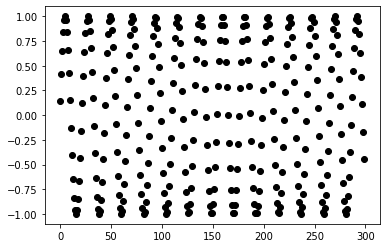

Linear interpolation


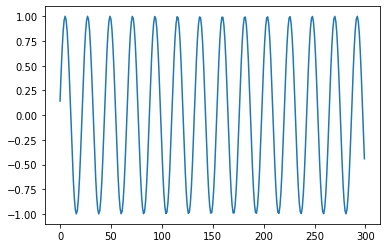

In [108]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline    

theta = 1/7  # angle in radians

x = np.arange(0,300,1)   # (start, stop, step)
y = np.sin((2*x + 1) * np.sin(theta))

print("Scatter plot")
plt.plot(x, y, 'o', color='black')
plt.show()

print("Linear interpolation")
plt.plot(x, y)
plt.show()


Naturally, in addition to making the probability of obtaining an element $x\in A_1$ from the measurement, we would also like to choose $t$ to be as small as possible, as $t$ applications of the operation $G$ requires $t$ queries to the function $f.$
Because we're aiming to make

$$
\sin( (2t + 1) \theta) \approx 1,
$$

a natural way to do this is to choose $t$ so that

$$
(2t + 1) \theta \approx \frac{\pi}{2}.
$$

Solving for $t$ yields

$$
t \approx \frac{\pi}{4\theta} - \frac{1}{2}.
$$

Of course, $t$ must be an integer, so we won't necessarily be able to hit this value exactly.
As we proceed with the analysis, we'll see that the quality of the approximations will naturally be affected by this constraint.

Recalling that the value of the angle $\theta$ is given by the formula

$$
\theta 
= \sin^{-1}\biggl(\sqrt{\frac{\vert A_1\vert}{N}}\biggr),
$$

we also see that our estimate $t \approx \pi/(4\theta) - 1/2$ depends on the number of strings in $A_1.$
This presents a challenge if we don't know how many solutions we have, as we'll discuss later.

### Unique search

First, let's focus on the situation in which there's a single string $x$ such that $f(x)=1.$
Another way to say this is that we're considering an instance of the *Unique search* problem.

In this case we have

$$
\theta = \sin^{-1}\biggl( \sqrt{\frac{1}{N}} \biggr),
$$

which can conveniently be approximated as

$$
\theta = \sin^{-1}\biggl( \sqrt{\frac{1}{N}} \biggr) \approx \sqrt{\frac{1}{N}}
$$

when $N$ gets large.
The following code cell provides some sense for the closeness of this approximation for exponentially increasing values of $N.$

In [109]:
from numpy import arcsin
from math import sqrt

for k in range(1,21):
    N = 2**k
    print("%d\t %12.10f\t %12.10f" % (N, 1/sqrt(N), arcsin(1/sqrt(N))))

2	 0.7071067812	 0.7853981634
4	 0.5000000000	 0.5235987756
8	 0.3535533906	 0.3613671239
16	 0.2500000000	 0.2526802551
32	 0.1767766953	 0.1777106008
64	 0.1250000000	 0.1253278312
128	 0.0883883476	 0.0885038431
256	 0.0625000000	 0.0625407618
512	 0.0441941738	 0.0442085726
1024	 0.0312500000	 0.0312550885
2048	 0.0220970869	 0.0220988856
4096	 0.0156250000	 0.0156256359
8192	 0.0110485435	 0.0110487683
16384	 0.0078125000	 0.0078125795
32768	 0.0055242717	 0.0055242998
65536	 0.0039062500	 0.0039062599
131072	 0.0027621359	 0.0027621394
262144	 0.0019531250	 0.0019531262
524288	 0.0013810679	 0.0013810684
1048576	 0.0009765625	 0.0009765627


As we estimated above, we can hope to make the quantity $\sin((2t + 1)\theta)$ close to $1$ by aiming for

$$
t \approx \frac{\pi}{4\theta} - \frac{1}{2}.
$$

If we substitute $\theta = 1/\sqrt{N}$ into this expression, we obtain

$$
t \approx
\frac{\pi\sqrt{N}}{4} - \frac{1}{2}
$$

The closest integer to this value is

$$
t = \Bigl\lfloor \frac{\pi}{4}\sqrt{N} \Bigr\rfloor.
$$

Recalling that $t$ is not only the number of times the operation $G$ is performed, but also the number of queries to the function $f$ required by the algorithm, we see that we're on track to obtaining an algorithm that requires $O(\sqrt{N})$ queries.

Now we'll investigate how well this choice of $t$ works.
The probability that the final measurement results in the unique string in $A_1$ can be expressed explicitly as

$$
p_N = 
\sin^2 \biggl(
\Bigl(
2 \bigl\lfloor \frac{\pi}{4}\sqrt{N}\bigr\rfloor + 1 
\Bigr)
\sin^{-1} \Bigl(
1/\sqrt{N}
\Bigr)
\biggr).
$$

Here's a code cell that calculates the probability of success for increasing values of $n.$

In [85]:
from numpy import arcsin, sin
from math import sqrt, pi, floor

for n in range(1,20):
    N = 2**n
    print("%d\t %12.10f" % (N, sin((2*floor(pi*sqrt(N)/4) + 1)*arcsin(1/sqrt(N)))**2))

2	 0.5000000000
4	 1.0000000000
8	 0.9453125000
16	 0.9613189697
32	 0.9991823155
64	 0.9965856808
128	 0.9956198657
256	 0.9999470421
512	 0.9994480262
1024	 0.9994612447
2048	 0.9999968478
4096	 0.9999453461
8192	 0.9999157752
16384	 0.9999997811
32768	 0.9999868295
65536	 0.9999882596
131072	 0.9999992587
262144	 0.9999978382
524288	 0.9999997279


Notice that these probabilities are not strictly increasing, and in particular we have an interesting anomaly when $N=4,$ where we get a solution with certainty.
However, it can be shown in general that $p_N \geq 1 - 1/N$ for all $N,$ so the probability of success goes to $1$ in the limit as $N$ becomes large.

This is good — but notice that even a weak bound such as $p_N \geq 1/2$ establishes the utility of the algorithm.
For whatever measurement outcome $x$ we obtain from running the procedure, we can always check to see if $f(x) = 1$ using a single query to $f.$
And if we fail to obtain the unique string $x$ for which $f(x) = 1$ with probability at most $1/2$ by running the procedure once, then after $m$ independent runs of the procedure we will have failed to obtain this unique string $x$ with probability at most $2^{-m}.$
That is, using $O(m \sqrt{N})$ queries to $f,$ we'll obtain the unique solution $x$ with probability at least $1 - 2^{-m}.$
Using the better bound $p_N \geq 1 - 1/N$ reveals that the probability to find $x\in A_1$ using this method is actually at least $1 - N^{-m}.$

### Multiple solutions

As the number of elements in $A_1$ varies, so too will the angle $\theta,$ and this can have a very significant effect on the probability of success.
For the sake of brevity, let's write $s = \vert A_1 \vert$ to denote the number of solutions, and as before we'll assume that $s\geq 1.$

For example, suppose that $s = 4$ rather than $s=1$ as we considered above.
This means that we have

$$
\theta = \sin^{-1}\biggl( \sqrt{\frac{4}{N}} \biggr),
$$

which is approximately double the angle we had in the $\vert A_1 \vert = 1$ case when $N$ is large.

If we stick with the same choice

$$
t = \Bigl\lfloor \frac{\pi}{4}\sqrt{N} \Bigr\rfloor
$$

as before, the effects will be catastrophic as the next code cell demonstrates.
The difference between this code cell and the similar one above is that the argument of `arcsin` is doubled.
(The loop starts from $n=2$ rather than $n=1$ because we need $n\geq 2$ to allow for $4$ solutions to exist.
The value $2/\sqrt{N}$ also falls outside of the domain of the `arcsin` function when $N=2,$ so we can avoid getting a warning thrown at us by starting the loop from $2.$)

In [177]:
from numpy import arcsin, sin
from math import sqrt, pi, floor

for n in range(2,20): # starting at n=2 to stay in the domain of arcsin
    N = 2**n
    print("%d\t %12.10f" % (N, sin((2*floor(pi*sqrt(N)/4) + 1)*arcsin(2/sqrt(N)))**2))

4	 1.0000000000
8	 0.5000000000
16	 0.2500000000
32	 0.0122070312
64	 0.0203807689
128	 0.0144530758
256	 0.0000705058
512	 0.0019310741
1024	 0.0023009083
2048	 0.0000077506
4096	 0.0002301502
8192	 0.0003439882
16384	 0.0000007053
32768	 0.0000533810
65536	 0.0000472907
131072	 0.0000030066
262144	 0.0000086824
524288	 0.0000010820


The probability of success goes to $0$ as $N$ goes to infinity.
This happens because we're effectively rotating twice as fast as we did when there is a unique solution, so we end up zooming past the target $\vert A_1\rangle$ and landing near $-\vert A_0\rangle.$

The natural question is, what can be done about this?
The answer depends on what information is available beforehand.

If we know the value $s$ ahead of time, we can simply adjust our choice of $t$ accordingly.
In particular, we can simply calculate

$$
t = \Bigl\lfloor \frac{\pi}{4\theta}\Bigr\rfloor
$$

for

$$
\theta = \sin^{-1}\biggl( \sqrt{\frac{s}{N}} \biggr).
$$

Using this choice of $t$ leads to success with high probability, as the following code cell suggests.

In [176]:
from numpy import arcsin, sin
from math import sqrt, pi, floor, ceil, log2

s = 7 # number of solutions — adjust as desired

for n in range(ceil(log2(s)),ceil(log2(s))+20):
    N = 2**n
    theta = arcsin(sqrt(s/N))                  
    t = floor(pi/(4*theta))
    print("%8d\t %12.10f" % (N, sin((2*t + 1)*theta)**2))

       8	 0.8750000000
      16	 0.6835937500
      32	 0.9877929688
      64	 0.9869401455
     128	 0.9933758959
     256	 0.9942813445
     512	 0.9977678832
    1024	 0.9999963373
    2048	 0.9999257666
    4096	 0.9983374778
    8192	 0.9995465664
   16384	 0.9995822234
   32768	 0.9999531497
   65536	 0.9998961946
  131072	 0.9999998224
  262144	 0.9999745784
  524288	 0.9999894829
 1048576	 0.9999939313
 2097152	 0.9999979874
 4194304	 0.9999986243


It can be proved that, in general, this choice of $t$ leads to success with probability at least $1 - s/N.$

This lower bound of $1 - s/N$ on the probability of success is slightly peculiar in that more solutions implies a worse lower bound — but under the assumption that $s$ is significantly smaller than $N,$ we nevertheless conclude that the probability of success is reasonably high.
Also notice that if $s / N$ is large, where the lower bound does not imply a good probability of success, we really don't need Grover's algorithm: a simple random guess yields a string $x\in A_1$ with probability 
$s / N.$

Now let's take a look at the number of iterations

$$
t = \Bigl\lfloor \frac{\pi}{4\theta}\Bigr\rfloor,
$$

for

$$
\theta = \sin^{-1}\biggl(\sqrt{\frac{s}{N}}\biggr).
$$

For every $\alpha \in [0,1],$ it is the case that $\sin^{-1}(\alpha)\geq \alpha,$ 
and so

$$
\theta = \sin^{-1}\left(\sqrt{\frac{s}{N}}\right) \geq \sqrt{\frac{s}{N}}.
$$

This implies that

$$
t \leq \frac{\pi}{4\theta} \leq \frac{\pi}{4}\sqrt{\frac{N}{s}}.
$$

This translates to a savings in the number of queries as $s$ grows.
In particular, the number of queries required is

$$
O\biggl(\sqrt{\frac{N}{s}}\biggr),
$$

as opposed to $O(\sqrt{N}).$

### Unknown number of solutions

If the number of solutions $s = \vert A_1 \vert$ is *unknown*, then a different approach is required, for in this situation we have no knowledge of $s$ to inform our choice of $t.$
There are different approaches.

One simple approach is to choose

$$
t \in \Bigl\{ 1,\ldots,\bigl\lfloor\pi\sqrt{N}/4\bigr\rfloor \Bigr\}
$$

*uniformly at random*.

As it turns out, selecting $t$ in this way finds a solution $x\in A_1$ (assuming it is nonempty) with probability greater than 40%.
This is not at all obvious, and requires an analysis that will not be included here.
But intuitively speaking it makes sense, particularly when we think about the geometric picture —
the state of $\mathsf{Q}$ is being rotated a random number of times, which will likely give us a vector for which the coefficient of $\vert A_1\rangle$ is at least reasonably large.

By repeating this procedure and checking the outcome in the same way as described before, the probability to find a solution can be made very close to $1.$
The number of queries required varies, but as an asymptotic upper bound we can say that $O(\sqrt{N})$ queries are required.

There is a refined method that finds a solution (if one exists) using $O(\sqrt{N/s})$ queries, even when the number of solutions $s$ is not known.
The basic idea is to choose $t$ uniformly at random from the set $\{1,\ldots,K\}$ iteratively for increasing values of $K.$
In particular, we can start with $K = 1$ and increase it exponentially, always terminating the process as soon as a solution is found.
This process takes advantage of the fact that fewer queries are required when more solutions exist.
Some care is required, however, to balance the rate of growth of $K$ with the probability of success for each iteration.

### The trivial cases



## Further discussion

### Extensions and generalizations

### Optimality

### Other notions of quantum search


In [172]:
from numpy import arcsin, sin
from math import sqrt, pi, floor, ceil, log2, degrees

N = 2**6
s = 1 # number of solutions

theta = arcsin(sqrt(s/N))





print("%d\t %12.10f" % (N, degrees(theta)))

print(floor(pi/(4*theta)))

64	 7.1807557815
6
